## Fake news classification

In [1]:
import os 
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection         import train_test_split
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics

from pathlib       import Path

In [2]:
# set root directory
path_root = Path("C:/Users/giann/repositories/personal-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\repositories\personal-core


### Import dataset

In [3]:
path_dataset = path_root / 'dataset/fake_or_real_news.csv'
data = pd.read_csv(path_dataset, index_col = 0) 

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Preprocess

In [4]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.33, random_state = 53)

**OPTION 1** 

In [84]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])
# inspect count vector df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
print(count_df.head())

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']
   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]


**OPTION 2** 

In [85]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)
# Print the first 10 features & first 5 vectors of the tfidf training data
print(tfidf_vectorizer.get_feature_names()[:10])
print(tfidf_train[:5])
# inspec tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
print(tfidf_df.head())

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']
  (1, 36831)	0.10772488937433063
  (1, 47506)	0.1453906087746004
  (1, 38823)	0.06048803110658641
  (1, 25684)	0.10304209221897535
  (1, 21568)	0.10079209195663975
  (1, 36087)	0.1264867985438989
  (1, 16814)	0.10404977746548134
  (1, 49203)	0.16727408617843761
  (1, 25686)	0.13550453594288978
  (1, 15927)	0.4973826512693339
  (1, 29531)	0.1454406205718244
  (1, 8399)	0.08729542880625331
  (1, 42534)	0.06081715886809214
  (1, 21881)	0.21271688045815967
  (1, 35256)	0.12628385718450852
  (1, 35783)	0.3090269081882796
  (1, 51896)	0.11596517664605863
  (1, 44520)	0.4973826512693339
  (1, 15924)	0.3479045460649077
  (1, 50628)	0.061296988343109565
  (1, 54177)	0.1378262914471113
  (1, 12105)	0.1500806646147686
  (1, 42470)	0.07711040274149523
  (2, 9445)	0.22180388050235564
  (2, 8779)	0.19767342113068423
  :	:
  (4, 39589)	0.04099604806912218
  (4, 41311)	0.039355852313436045
  (4, 46712)	0.082717872

### Check difference between the two approaches

In [86]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

set()
False


### Train with count matrix

In [62]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
y_pred = nb_classifier.predict(count_test)

In [64]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy score  = {round(score,2)*100} %')

Accuracy score  = 89.0 %


In [65]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cm)

[[ 865  143]
 [  80 1003]]


Text(91.68, 0.5, 'True Value')

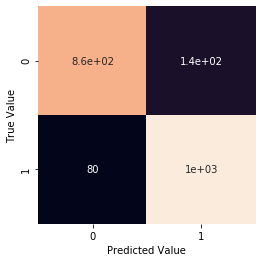

In [66]:
sns.heatmap(cm, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

### Train with count tf-idf

In [67]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
y_pred = nb_classifier.predict(tfidf_test)

In [69]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy score with tf-idf = {round(score,2)*100} %')

Accuracy score with tf-idf = 86.0 %


In [70]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(cm)

[[ 739  269]
 [  31 1052]]


Text(91.68, 0.5, 'True Value')

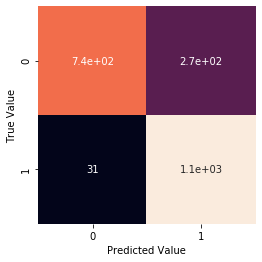

In [71]:
sns.heatmap(cm, square = True, annot = True, cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

### Model Improving tf-idf
- Tweaking alpha levels;
- Trying a new classification model;
- Training on a larger dataset;
- Improving text preprocessing.

In [72]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

In [73]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [74]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



C:\Anaconda3\envs\personal-core\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


### Model Inspection

In [75]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

In [76]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

In [77]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

In [78]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]


In [79]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'state'), (-7.35748985914622, 'republican'), (-7.33649923948987, 'campaign'), (-7.2854057032685775, 'president'), (-7.2166878130917755, 'sanders'), (-7.108263114902301, 'obama'), (-6.724771332488041, 'clinton'), (-6.5653954389926845, 'said'), (-6.328486029596207, 'trump')]
